In [1]:
from main import PororoOcr

/home/knowledge/anaconda3/envs/app_block/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


최초에 한번은 Model을 다운로드 합니다. 경로는 Windows의 경우 ```C:/pororo/misc```이고 Mac OS의 경우는 ```~/.pororo/misc/``` 입니다.

In [2]:
ocr = PororoOcr()

현재 지원 가능하는 언어는 영어와 한국어 입니다.

In [3]:
ocr.get_available_langs()

['en', 'ko']

In [4]:
ocr.get_available_models()

{'en': ['brainocr'], 'ko': ['brainocr']}

**Examples** 
```python
ocr = Pororo(task='ocr', lang='ko')
ocr(IMAGE_PATH)
```

In [12]:
import os
import cv2
from PIL import Image

def enhance_image_quality(input_image_path, output_image_path):
    # Read the image
    original_image = cv2.imread(input_image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply adaptive thresholding to enhance text
    threshold_image = cv2.adaptiveThreshold(
        blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY_INV, 7, 4
    )

    doubled_size_image = cv2.resize(threshold_image, (0, 0), fx=2, fy=2)

    # Save the enhanced image
    cv2.imwrite(output_image_path, doubled_size_image)

def enhance_images_in_folder(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust the file extensions as needed
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, f"{filename}")
            enhance_image_quality(input_image_path, output_image_path)

if __name__ == "__main__":
    input_folder_path = '/home/knowledge/workspace/bhushan/cognet9/upstage_comparison'
    output_folder_path = '/home/knowledge/workspace/bhushan/cognet9/upstage_enhanced_comparison'

    enhance_images_in_folder(input_folder_path, output_folder_path)


In [13]:
import os
import json

def pororo_ocr(img_path):
    # Assuming you have the necessary imports and ocr module
    # Replace with actual imports and module names
    ocr.run_ocr(img_path, debug=False)
    res = ocr.get_ocr_result()
    word_coordinates = []

    for i in range(len(res['description'])):
        word = res['description'][i]
        vertices = res['bounding_poly'][i]['vertices']
        vertices_list = [{'x': vertex['x'], 'y': vertex['y']} for vertex in vertices]
        word_coordinates.append({
            'text': word,
            'boundingBox': {'vertices': vertices_list}
        })

    return word_coordinates

def process_images_in_folder(folder_path):
    results = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust the file extensions as needed
            img_path = os.path.join(folder_path, filename)
            words_data = pororo_ocr(img_path)
            results.append({
                'image_path': img_path,
                'words': words_data
            })

    return results

def save_results_to_json(results, output_json_path):
    with open(output_json_path, 'w', encoding='utf-8') as json_file:
        json.dump(results, json_file, indent=2, ensure_ascii=False)


if __name__ == "__main__":
    folder_path = '/home/knowledge/workspace/bhushan/cognet9/upstage_enhanced_comparison'  # Replace with the path to your images folder
    output_json_path = '/home/knowledge/workspace/bhushan/cognet9/pororo_enhanced_output.json'  # Replace with the desired output JSON file path

    results = process_images_in_folder(folder_path)
    save_results_to_json(results, output_json_path)


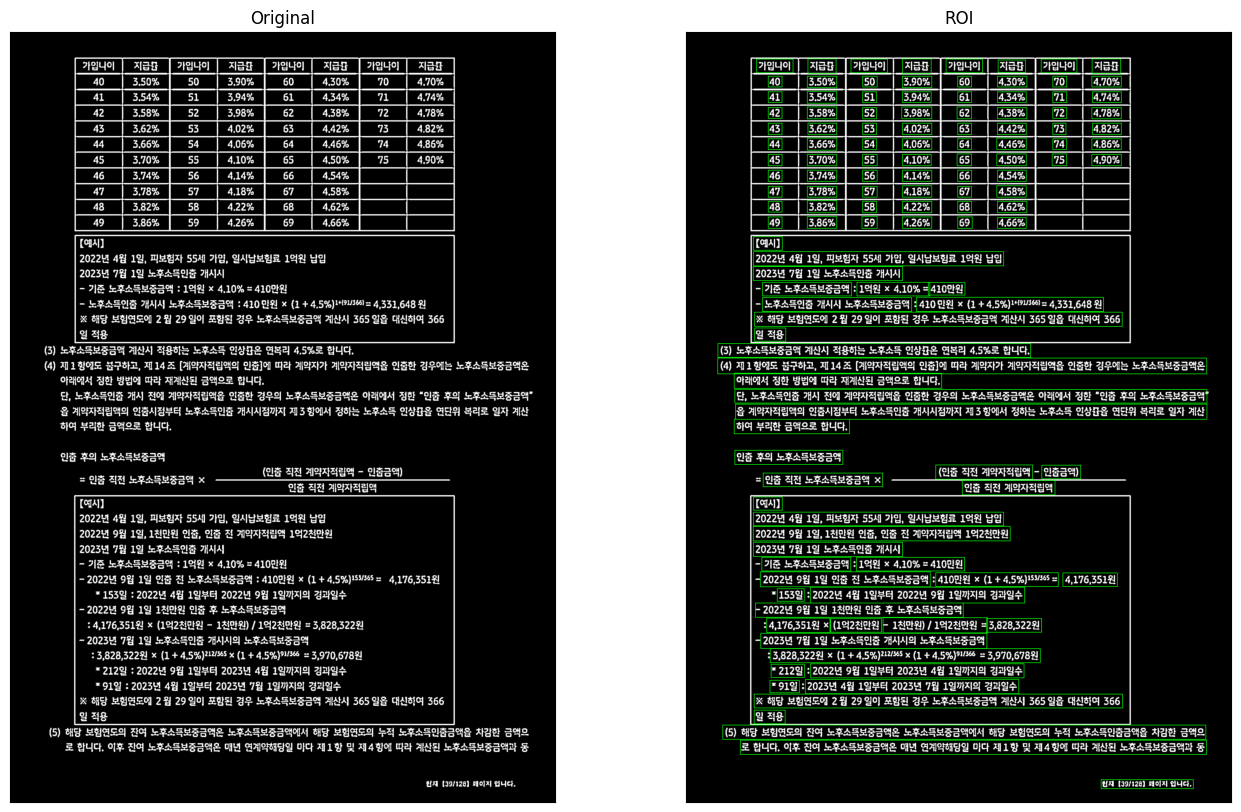

['지급군',
 '지급한',
 '지급과',
 '가입니이',
 '가입나이',
 '가입나이',
 '가입나이',
 '지급]',
 '40',
 '3.50%',
 '5O',
 '3.90%',
 '60',
 '4.30%',
 '70',
 '4,.70%',
 '3.54%',
 '41',
 '51',
 '3.94%',
 '61',
 '4.34%',
 '71',
 '4.74%',
 '3.58%',
 '3.98%',
 '62',
 '42',
 '52',
 '4.38%',
 '72',
 '4,78%',
 '43',
 '3.62%',
 '53',
 '4.02%',
 '63',
 '4.42%',
 '73',
 '4.82%',
 '3.66%',
 '4.46%',
 '44',
 '54',
 '4.06%',
 '64',
 '74',
 '4.86%',
 '65',
 '4.50%',
 '75',
 '45',
 '3.70%',
 '55',
 '4.10%',
 '4.90%',
 '46',
 '3.74%',
 'S6',
 '4.14%',
 '66',
 '4.54%',
 '4.18%',
 '4.58%',
 '47',
 '3.78%',
 '57',
 '67',
 '3.82%',
 '48',
 '58',
 '4.22%',
 '68',
 '4.62%',
 '3.86%',
 '59',
 '49',
 '4.26%',
 '69',
 '4.66%',
 '[예시]',
 '2022년 4월 1일, 피보환자 554 가업, 일시납보험로 1억원 냉입',
 '2023년 7월 1일 노후소득인출 개시시',
 '기준 노후소득보증금액',
 '1억원 x 4.10% =',
 '410만원',
 '420단원 = (1 + 4.5%}*00비= 4331.648원 #',
 '노후소득인출 개시시 노후소득보중금액',
 '11 채딩 브림연자 2월 2)일이 포함된 경우 노피스득보공금의 계선이 35코 일을 대원하여 366',
 '일 적용',
 '1회, 노후소득보중금직 계선시 작출하는 노후스득, 민상원은 면복터 4.3%로 합니다.',
 '(용 72 인엔째

In [17]:
img_path = '/home/knowledge/workspace/bhushan/cognet9/upstage_enhanced_comparison/20230612_무배당 KB평생소득변액연금보험 Plus_약관_Img_038.png'
ocr.run_ocr(img_path, debug=True) 

In [ ]:
img_path = 'D:/jupyter/korean_ocr_using_pororo/table_docs_insurance/14.png'
ocr.run_ocr(img_path, debug=True) 

In [ ]:
ocr.get_ocr_result()

In [ ]:
import cv2

img_path = 'D:/jupyter/korean_ocr_using_pororo/table_docs_insurance/14.png'

# Read the image using OpenCV
image_array = cv2.imread(img_path)

# Ensure the image is successfully loaded
if image_array is not None:
    print(f"Image shape: {image_array.shape}")
else:
    print("Failed to load the image.")

ocr.run_ocr(image_array, debug=True) 

## Convert PDF files into images

In [ ]:
from pdf2image import convert_from_path
import os

def convert_pdf_to_images(pdf_path, output_dir):
    # Convert PDF to a list of Pillow images
    images = convert_from_path(pdf_path)

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Get the original PDF filename without extension
    pdf_filename = os.path.splitext(os.path.basename(pdf_path))[0]

    # Save each image as a separate JPG file with the original PDF filename
    for i, image in enumerate(images):
        image_path = os.path.join(output_dir, f"{pdf_filename}_page_{i + 1}.jpg")
        image.save(image_path, "JPEG", quality=100)

if __name__ == "__main__":
    # Replace 'pdf_directory' with the path to your PDF files
    pdf_directory = "D:/OCR"
    
    # Replace 'output_directory' with the desired output directory for JPG images
    output_directory = "D:/OCR/images"
    i = 0

    # Iterate through each PDF file in the specified directory
    for pdf_file in os.listdir(pdf_directory):
        if pdf_file.endswith(".pdf"):
            pdf_path = os.path.join(pdf_directory, pdf_file)
            
            # Perform the conversion for the current PDF file
            convert_pdf_to_images(pdf_path, output_directory)
            # print(f"Conversion for {pdf_file} complete.")
            i = i+1
            print(i)

    print("All conversions complete.")
